# Setup

In [1]:

!pip install fredapi 
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
from kaggle_secrets import UserSecretsClient

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


env = UserSecretsClient()
fred_key = env.get_secret('FRED-API')


# 1. Create Fred Object

In [3]:
# Fred
from fredapi import Fred
fred = Fred(api_key=fred_key)

#Search Economic data
sa_economic_indicators = fred.search("south africa")

#Display concise summary of result
sa_economic_indicators.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
ZAFCPIALLMINMEI,ZAFCPIALLMINMEI,2025-01-07,2025-01-07,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-11-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-12-16 13:56:04-06:00,37,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
CPALTT01ZAM659N,CPALTT01ZAM659N,2025-01-07,2025-01-07,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2024-11-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2024-12-16 13:56:05-06:00,14,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
ZAFCPIALLQINMEI,ZAFCPIALLQINMEI,2025-01-07,2025-01-07,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-07-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-11-15 13:55:08-06:00,9,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
CPALTT01ZAM657N,CPALTT01ZAM657N,2025-01-07,2025-01-07,Consumer Price Index: All Items: Total for Sou...,1957-02-01,2024-02-01,Monthly,M,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2024-04-10 11:29:19-05:00,7,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...
CPALTT01ZAQ657N,CPALTT01ZAQ657N,2025-01-07,2025-01-07,Consumer Price Index: All Items: Total for Sou...,1957-04-01,2023-10-01,Quarterly,Q,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2024-04-10 11:32:02-05:00,2,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...


In [4]:
#create economic indicatos objects

unemployment = fred.get_series('LRUN64TTZAA156S', observation_start='2000-01-01', observation_end='2020-04-01')
gdp = fred.get_series('NGDPRSAXDCZAQ', observation_start='2000-01-01', observation_end='2020-04-01')
interest_rate = fred.get_series('IR3TIB01ZAM156N', observation_start='2000-01-01', observation_end='2020-04-01')
manufacturing = fred.get_series('ZAFPRMNTO01GYSAM', observation_start='2000-01-01', observation_end='2020-04-01')
mining = fred.get_series('ZAFPRMITO01IXOBSAM', observation_start='2000-01-01', observation_end='2020-04-01')
net_lending_borrowing = fred.get_series('ZAFBFDBP6GDPPT', observation_start='2000-01-01', observation_end='2020-04-01')



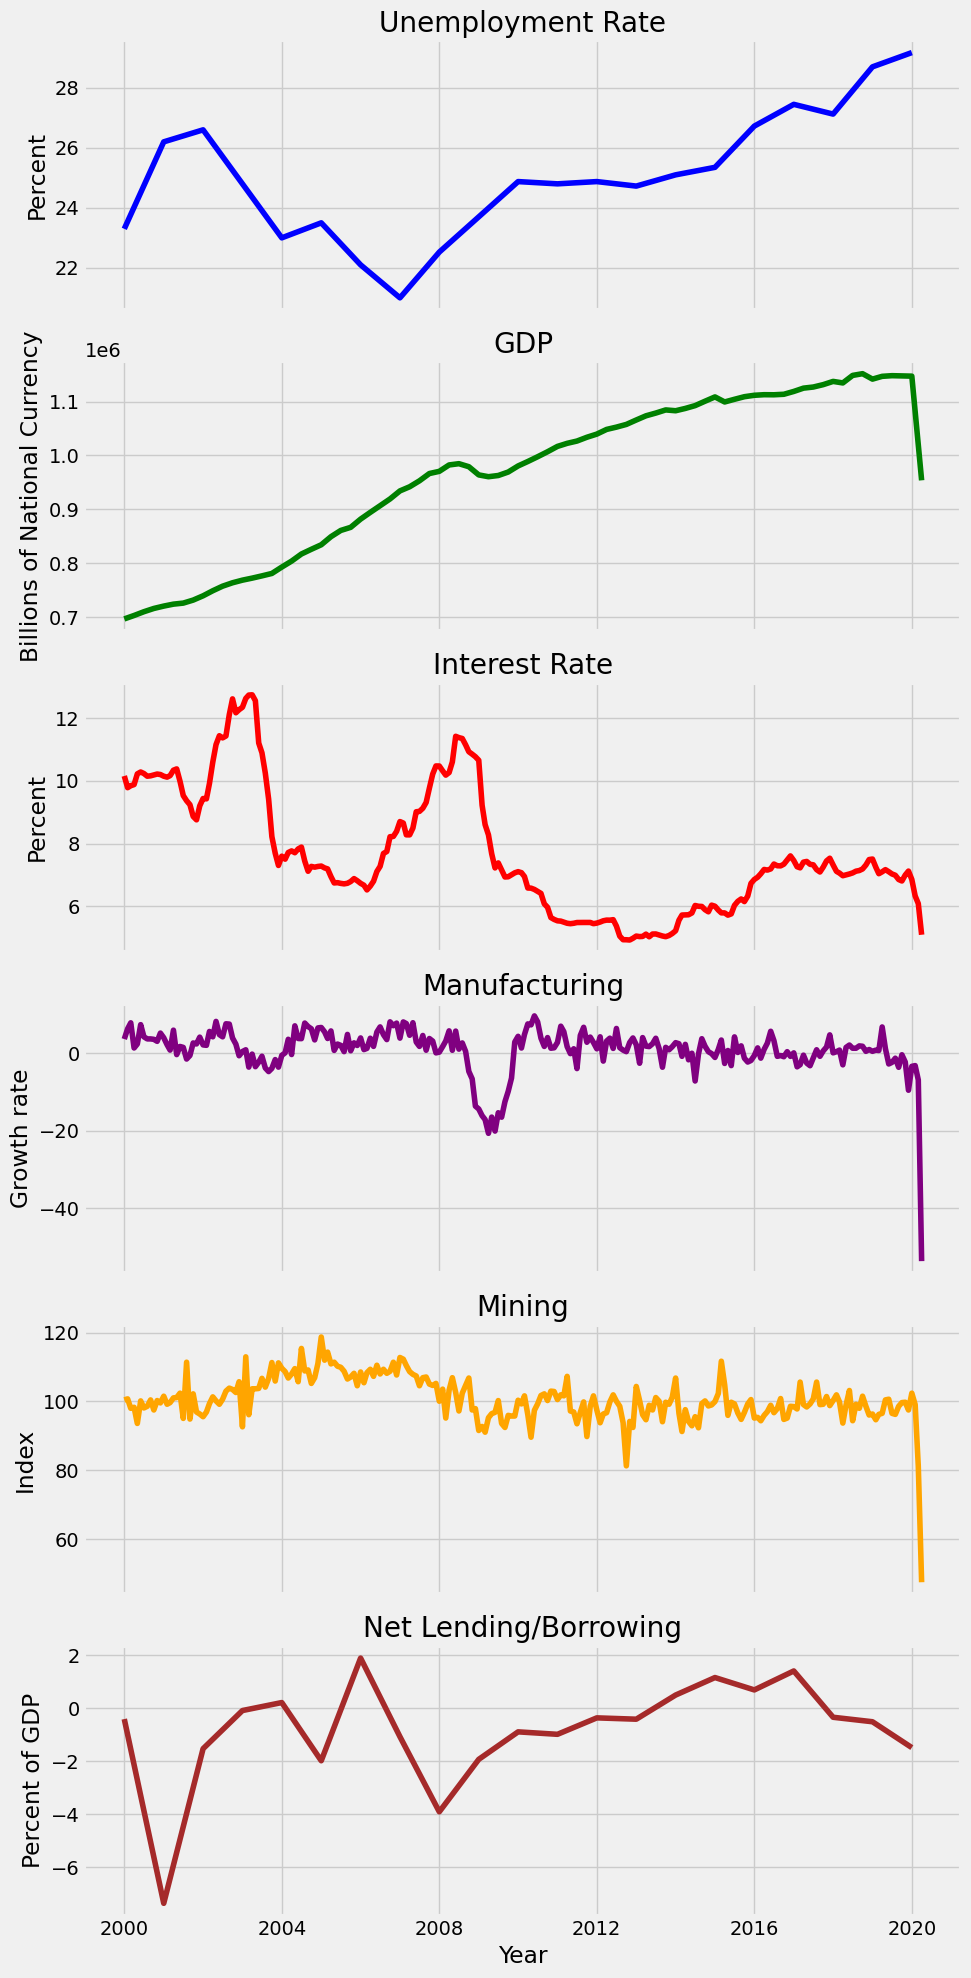

In [5]:
#Display series 
    
fig, axes = plt.subplots(6, 1, figsize=(10, 20), sharex=True)

# Plot each series
axes[0].plot(unemployment.index, unemployment, color='blue')
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('Percent')

axes[1].plot(gdp.index, gdp, color='green')
axes[1].set_title('GDP')
axes[1].set_ylabel('Billions of National Currency')

axes[2].plot(interest_rate.index, interest_rate, color='red')
axes[2].set_title('Interest Rate')
axes[2].set_ylabel('Percent')

axes[3].plot(manufacturing.index, manufacturing, color='purple')
axes[3].set_title('Manufacturing')
axes[3].set_ylabel('Growth rate')

axes[4].plot(mining.index, mining, color='orange')
axes[4].set_title('Mining')
axes[4].set_ylabel('Index')

axes[5].plot(net_lending_borrowing.index, net_lending_borrowing, color='brown')
axes[5].set_title('Net Lending/Borrowing')
axes[5].set_ylabel('Percent of GDP')

# Add a shared X-label
plt.xlabel('Year')
plt.tight_layout()

# Display the plots
plt.show()

# Evaluating South Africa's Recovery

In [6]:
#import scikit-learn's model for prediction 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
# Prepare the data
# Fetch the quarterly unemployment rate series
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start=None, observation_end='2019-12-31')

# Prepare the data
data = unemployment.reset_index()  # Convert the Series to a DataFrame
data.columns = ['Date', 'Unemployment']  # Rename columns
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  

imputer = SimpleImputer(strategy="mean")
data['Unemployment'] = imputer.fit_transform(data[['Unemployment']])


# Different ML Models

## 1 - Linear Regression

Model Performance:
R² Score: 0.12
Mean Absolute Error: 1.62%


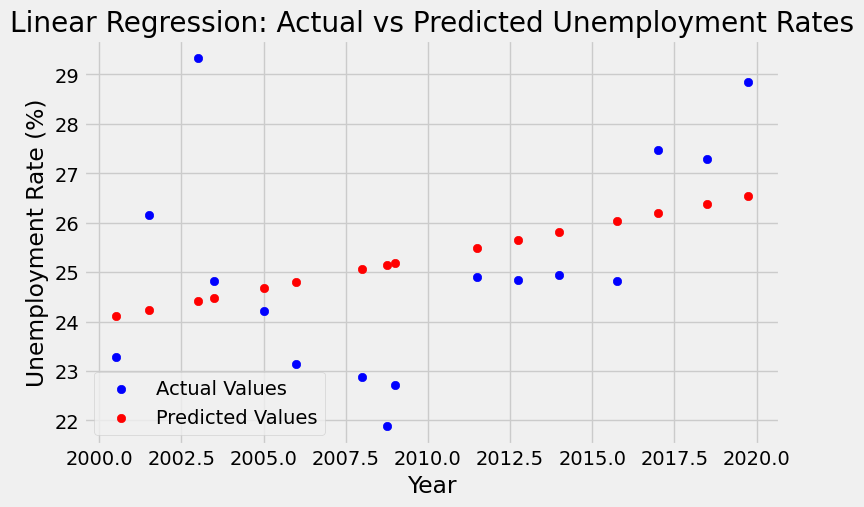

In [8]:

# Features (X) and target (y)
X = data[['Year']]  # Use fractional years as features
y = data['Unemployment']  # Use unemployment rates as the target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)  # R² score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

print(f"Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}%")

# Optionally, plot actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual Values", color="blue")
plt.scatter(X_test, y_pred, label="Predicted Values", color="red")
plt.title("Linear Regression: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 2 - MLP Regressor

MLPRegressor Performance:
R² Score: -19.81
Mean Absolute Error: 9.49%


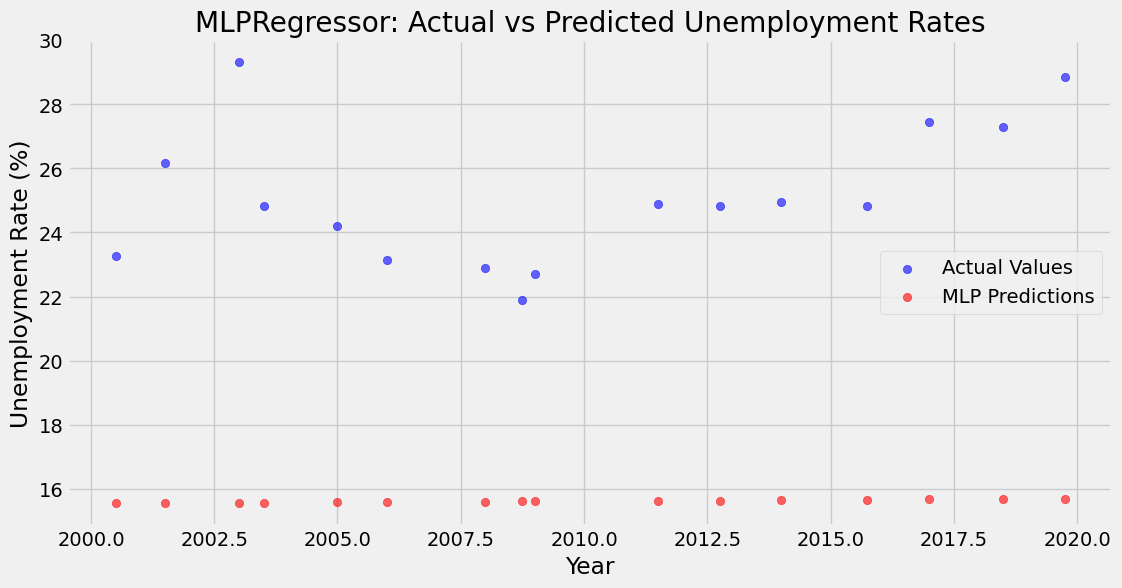

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer


# Fetch unemployment data (quarterly, earliest to March 1, 2020)
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start='2020-04-01', observation_end='2020-04-01')

# Convert data to DataFrame
data = unemployment.reset_index()
data.columns = ['Date', 'Unemployment']
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  # Fractional years






# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("MLPRegressor Performance:")
print(f"R² Score: {r2_mlp:.2f}")
print(f"Mean Absolute Error: {mae_mlp:.2f}%")


# Plot MLPRegressor predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual Values", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred_mlp, label="MLP Predictions", color="red", alpha=0.6)
plt.title("MLPRegressor: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 3 -SVR


Support Vector Regression Performance:
R² Score: 0.59
Mean Absolute Error: 0.94%


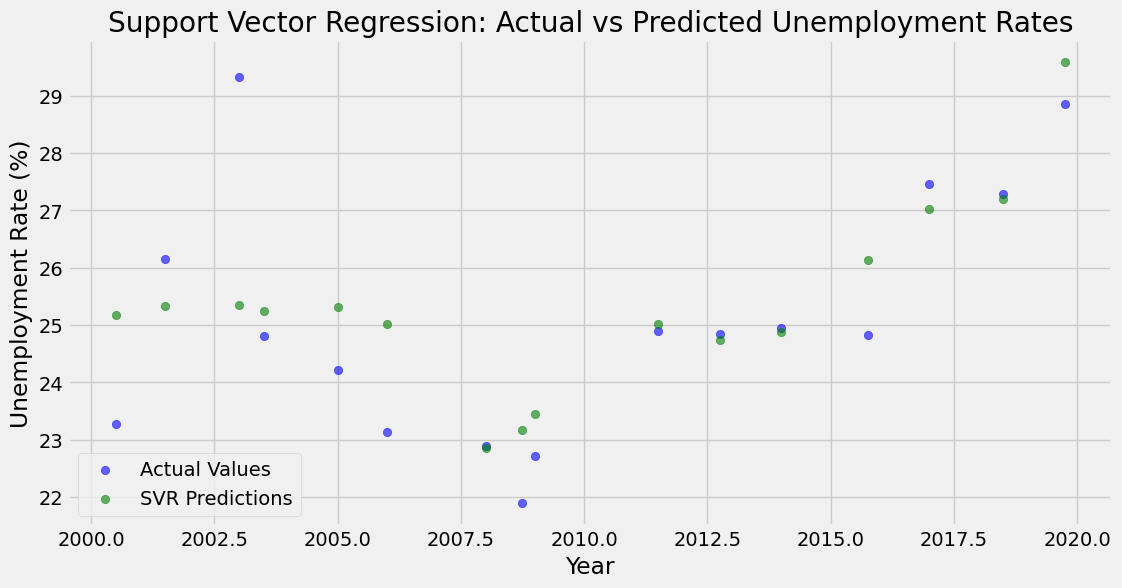

In [10]:
# Define and train Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\nSupport Vector Regression Performance:")
print(f"R² Score: {r2_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}%")

# Plot SVR predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual Values", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred_svr, label="SVR Predictions", color="green", alpha=0.6)
plt.title("Support Vector Regression: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 4 XGBoost

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV



XGBoost Model Performance:
R² Score: 0.64
Mean Absolute Error: 0.86%


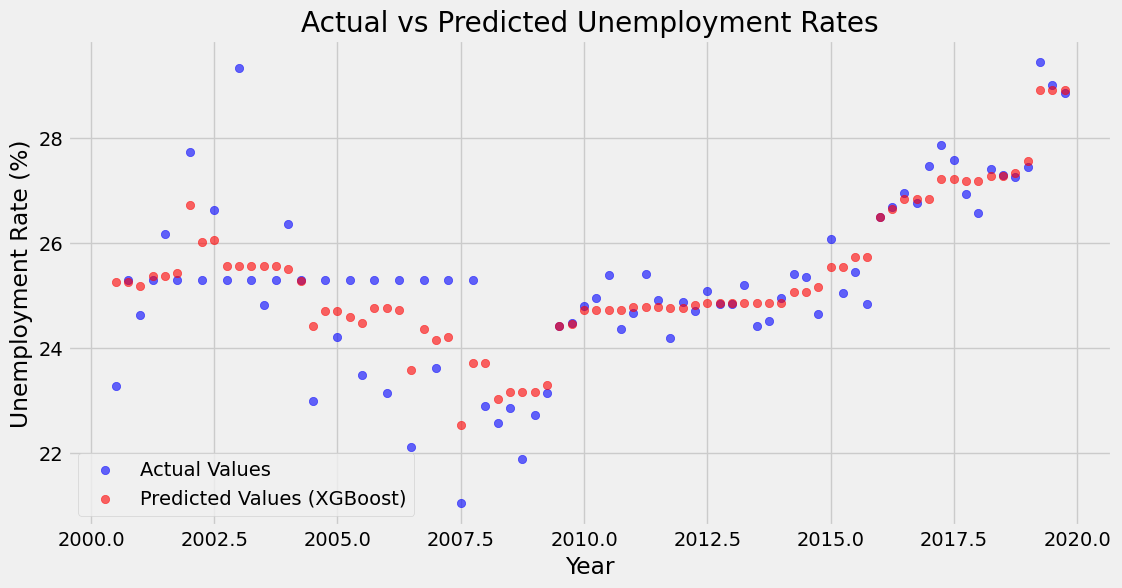

In [12]:

# Fetch unemployment data (quarterly, earliest to March 1, 2020)
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start=None, observation_end='2019-12-31')

# Convert data to DataFrame
data = unemployment.reset_index()
data.columns = ['Date', 'Unemployment']
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  # Fractional years

# Handle NaN values using mean imputation
imputer = SimpleImputer(strategy="mean")
data['Unemployment'] = imputer.fit_transform(data[['Unemployment']])

# Features (X) and target (y)
X = data[['Year']]  # Fractional years as features
y = data['Unemployment']  # Unemployment rates as the target

# Split data into training and testing sets (earliest to March 1, 2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost Regressor model
xgb_model = XGBRegressor(
    n_estimators=100, 
    learning_rate=0.075, 
    max_depth=2, 
    subsample=0.8, 
    colsample_bytree=0.9, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict unemployment rates on the testing set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}%")

# Predict unemployment rates for the entire dataset for visualization
data['Predicted_Unemployment'] = xgb_model.predict(X)

# Plot actual vs predicted unemployment rates
plt.figure(figsize=(12, 6))
plt.scatter(data['Year'], data['Unemployment'], label="Actual Values", color="blue", alpha=0.6)
plt.scatter(data['Year'], data['Predicted_Unemployment'], label="Predicted Values (XGBoost)", color="red", alpha=0.6)
plt.title("Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


## XGBoost Performance in Unemployment Rate Prediction

XGBoost outperformed other models with an **R² Score**: 0.60 and **Mean Absolute Error (MAE)**: 0.92%

- **Difficulty of Predicting Unemployment Rate of South Africa**:
  - Other factors can impact unemployment rate. Social, Historical, and Political factors
  - Human factors and nuances tend to be unpredictable
  - **R² score** of 0.60 and **(MAE)** of 0.92% is sufficient for this analysis.
